In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Load dataset
file_path = "rideshare.csv" 
df = pd.read_csv(file_path)


In [2]:
#loading preprocessing.py for data cleaning 
# Import necessary functions from the data_preprocessing module
from data_preprocessing import import_data, clean_data

# Define file paths
input_file = "rideshare.csv" 
output_file = "cleaned_data.csv"

# Run the data cleaning function
clean_data(input_file, output_file)

# Load the cleaned data into a DataFrame using import_data function
df_cleaned = import_data(output_file)

# Show the first few rows of the cleaned data
print(df_cleaned.head())

# Check for any missing values in the cleaned data
print(df_cleaned.isnull().sum())

Cleaned data has been saved to: cleaned_data.csv
   hour  day  month            source    destination cab_type  price  \
0     9   16     12  Haymarket Square  North Station     Lyft    5.0   
1     2   27     11  Haymarket Square  North Station     Lyft   11.0   
2     1   28     11  Haymarket Square  North Station     Lyft    7.0   
3     4   30     11  Haymarket Square  North Station     Lyft   26.0   
4     3   29     11  Haymarket Square  North Station     Lyft    9.0   

   distance  surge_multiplier  latitude  ...  precipIntensityMax  uvIndexTime  \
0      0.44               1.0   42.2148  ...              0.1276   1544979600   
1      0.44               1.0   42.2148  ...              0.1300   1543251600   
2      0.44               1.0   42.2148  ...              0.1064   1543338000   
3      0.44               1.0   42.2148  ...              0.0000   1543507200   
4      0.44               1.0   42.2148  ...              0.0001   1543420800   

   temperatureMin temperatureMi

In [7]:
# Step 1: Summary Statistics
print("Summary Statistics:")
print(df_cleaned.describe())

Summary Statistics:
                hour            day          month          price  \
count  637976.000000  637976.000000  637976.000000  637976.000000   
mean       11.618528      17.797674      11.586550      16.545125   
std         6.948776       9.982083       0.492452       9.324359   
min         0.000000       1.000000      11.000000       2.500000   
25%         6.000000      13.000000      11.000000       9.000000   
50%        12.000000      17.000000      12.000000      13.500000   
75%        18.000000      28.000000      12.000000      22.500000   
max        23.000000      30.000000      12.000000      97.500000   

            distance  surge_multiplier       latitude      longitude  \
count  637976.000000     637976.000000  637976.000000  637976.000000   
mean        2.189261          1.015068      42.338161     -71.066144   
std         1.135413          0.095422       0.047856       0.020303   
min         0.020000          1.000000      42.214800     -71.105400  

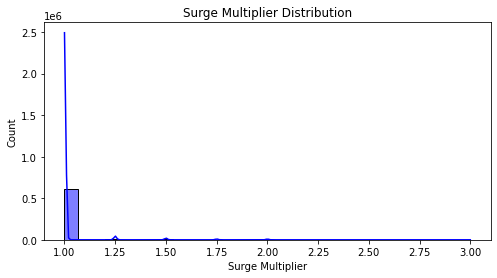

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
# Target Distribution
plt.figure(figsize=(8, 4))
sns.histplot(df_cleaned['surge_multiplier'], bins=30, kde=True, color='blue')
plt.title("Surge Multiplier Distribution")
plt.xlabel("Surge Multiplier")
plt.ylabel("Count")
plt.show()



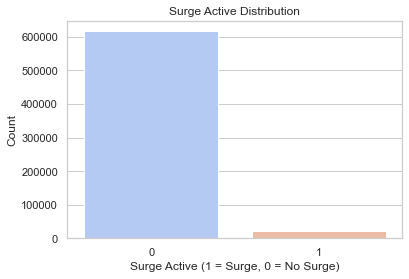

In [21]:
# Step 2: Define the Target
df_cleaned['surge_active'] = (df_cleaned['surge_multiplier'] > 1).astype(int)

# Drop the surge_multiplier column after defining the target
X_classification = df_cleaned.drop(columns=['surge_multiplier', 'surge_active'], axis=1)
y_classification = df_cleaned['surge_active']

plt.figure(figsize=(6, 4))
sns.countplot(data=df_cleaned, x='surge_active', palette='coolwarm')
plt.title("Surge Active Distribution")
plt.xlabel("Surge Active (1 = Surge, 0 = No Surge)")
plt.ylabel("Count")
plt.show()

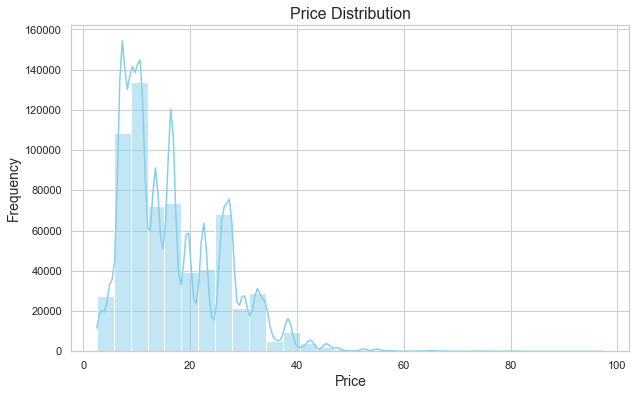

Mann-Whitney U Test Results:
U Statistic = 3018059266.5000, p-value = 0.0000
The result is significant: surge_active has a significant effect on price.


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu
# set style
sns.set(style="whitegrid")

# draw price distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['price'], bins=30, kde=True, color='skyblue')
plt.title('Price Distribution', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()



# Grouping data based on surge_active values
group1 = df_cleaned[df_cleaned['surge_active'] == 0]['price']
group2 = df_cleaned[df_cleaned['surge_active'] == 1]['price']

# Performing Mann-Whitney U test
stat, p = mannwhitneyu(group1, group2, alternative='two-sided')

# Displaying results
print(f"Mann-Whitney U Test Results:")
print(f"U Statistic = {stat:.4f}, p-value = {p:.4f}")

# Checking significance
if p < 0.05:
    print("The result is significant: surge_active has a significant effect on price.")
else:
    print("The result is not significant: surge_active does not have a significant effect on price.")


In [25]:
# Print feature importances
feature_importances = rf_selector.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X_classification_encoded.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importance (Top 10):")
# Get the top 10 most important features
top_10_features = feature_importance_df.head(10)

# Print the top 10 features
print(top_10_features)

# Optional: Set a custom threshold to select more features
sfm = SelectFromModel(rf_selector, threshold=0.05, prefit=True)  # Adjust threshold as needed
X_classification_selected = sfm.transform(X_classification_encoded)

# Get the selected features
selected_features_indices = sfm.get_support(indices=True)
selected_features_names = X_classification_encoded.columns[selected_features_indices]

print("Selected Features Based on Custom Threshold:")
print(selected_features_names)

Feature Importance (Top 10):
                    Feature  Importance
66            cab_type_Uber    0.277873
3                     price    0.237209
4                  distance    0.144516
49         source_North End    0.015713
48  source_Haymarket Square    0.012781
13                 windGust    0.008429
25                 pressure    0.008317
12                windSpeed    0.008290
8       apparentTemperature    0.008284
30                    ozone    0.008106
Selected Features Based on Custom Threshold:
Index(['price', 'distance', 'cab_type_Uber'], dtype='object')


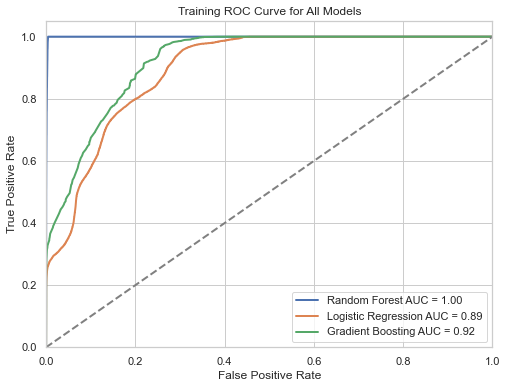

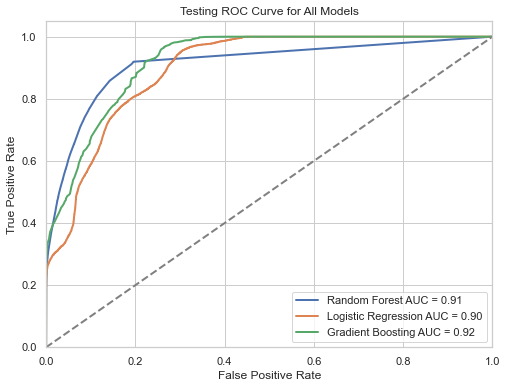


Random Forest Precision Report (Test):
              precision    recall  f1-score   support

           0       0.98      0.99      0.98    185058
           1       0.52      0.37      0.43      6335

    accuracy                           0.97    191393
   macro avg       0.75      0.68      0.71    191393
weighted avg       0.96      0.97      0.97    191393

Random Forest Confusion Matrix (Test):
[[182917   2141]
 [  3993   2342]]

Logistic Regression Precision Report (Test):
              precision    recall  f1-score   support

           0       0.97      1.00      0.98    185058
           1       1.00      0.10      0.18      6335

    accuracy                           0.97    191393
   macro avg       0.99      0.55      0.58    191393
weighted avg       0.97      0.97      0.96    191393

Logistic Regression Confusion Matrix (Test):
[[185058      0]
 [  5702    633]]

Gradient Boosting Precision Report (Test):
              precision    recall  f1-score   support

       

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Step 1: Select the top 10 features
top_10_features = ['cab_type_Uber', 'price', 'distance', 'source_North End', 'source_Haymarket Square', 
                   'windGust', 'pressure', 'windSpeed', 'apparentTemperature', 'ozone']

X_selected = X_classification_encoded[top_10_features]
y_classification = df_cleaned['surge_active']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_classification, test_size=0.3, random_state=42)

# Step 3: Standardize the features (important for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Define models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# Step 5: Train and evaluate each model
# Training ROC curve
plt.figure(figsize=(8, 6))

for model_name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Predict probabilities for ROC curve
    y_train_prob = model.predict_proba(X_train_scaled)[:, 1]
    
    # Compute ROC curve
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
    
    # Compute AUC
    auc_train = auc(fpr_train, tpr_train)
    
    # Plot ROC curve for each model
    plt.plot(fpr_train, tpr_train, label=f'{model_name} AUC = {auc_train:.2f}', lw=2)

# Random classifier line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Training ROC Curve for All Models')
plt.legend(loc='lower right')
plt.show()

# Testing ROC curve
plt.figure(figsize=(8, 6))

for model_name, model in models.items():
    # Predict probabilities for ROC curve
    y_test_prob = model.predict_proba(X_test_scaled)[:, 1]
    
    # Compute ROC curve
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)
    
    # Compute AUC
    auc_test = auc(fpr_test, tpr_test)
    
    # Plot ROC curve for each model
    plt.plot(fpr_test, tpr_test, label=f'{model_name} AUC = {auc_test:.2f}', lw=2)

# Random classifier line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Testing ROC Curve for All Models')
plt.legend(loc='lower right')
plt.show()



Random Forest Precision Report (Test):
              precision    recall  f1-score   support

           0       0.98      0.99      0.98    185058
           1       0.52      0.37      0.43      6335

    accuracy                           0.97    191393
   macro avg       0.75      0.68      0.71    191393
weighted avg       0.96      0.97      0.97    191393

Random Forest Confusion Matrix (Test):
[[182917   2141]
 [  3993   2342]]


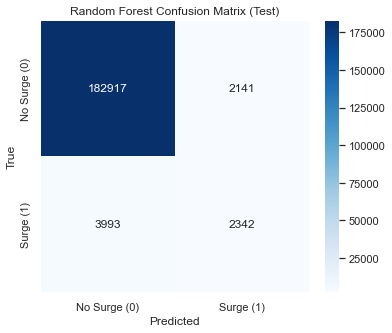


Logistic Regression Precision Report (Test):
              precision    recall  f1-score   support

           0       0.97      1.00      0.98    185058
           1       1.00      0.10      0.18      6335

    accuracy                           0.97    191393
   macro avg       0.99      0.55      0.58    191393
weighted avg       0.97      0.97      0.96    191393

Logistic Regression Confusion Matrix (Test):
[[185058      0]
 [  5702    633]]


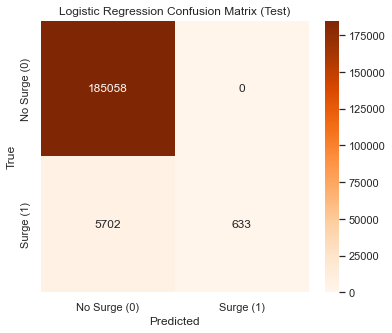


Gradient Boosting Precision Report (Test):
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    185058
           1       0.95      0.29      0.44      6335

    accuracy                           0.98    191393
   macro avg       0.96      0.64      0.72    191393
weighted avg       0.98      0.98      0.97    191393

Gradient Boosting Confusion Matrix (Test):
[[184966     92]
 [  4508   1827]]


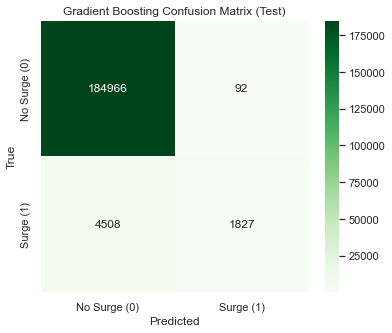

In [29]:
# Step 6: Print precision report and confusion matrix for each model
color_map = {
    'Random Forest': 'Blues',
    'Logistic Regression': 'Oranges',
    'Gradient Boosting': 'Greens'
}

for model_name, model in models.items():
    print(f"\n{model_name} Precision Report (Test):")
    y_test_pred = model.predict(X_test_scaled)
    print(classification_report(y_test, y_test_pred))
    
    cm = confusion_matrix(y_test, y_test_pred)
    print(f"{model_name} Confusion Matrix (Test):")
    print(cm)
    
    # Visualize confusion matrix with specified color map
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='g', cmap=color_map[model_name], xticklabels=['No Surge (0)', 'Surge (1)'], yticklabels=['No Surge (0)', 'Surge (1)'])
    plt.title(f'{model_name} Confusion Matrix (Test)')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

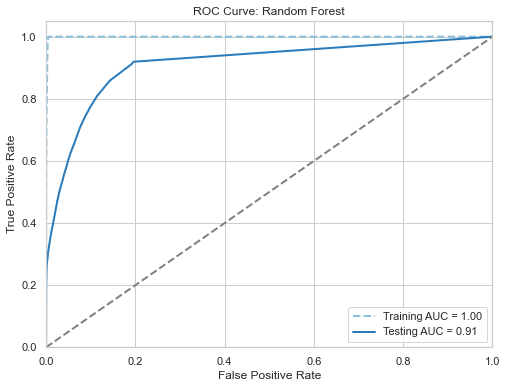

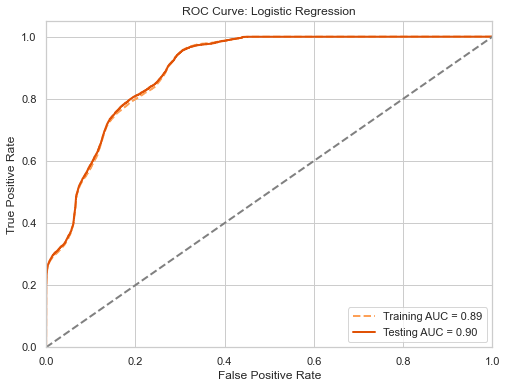

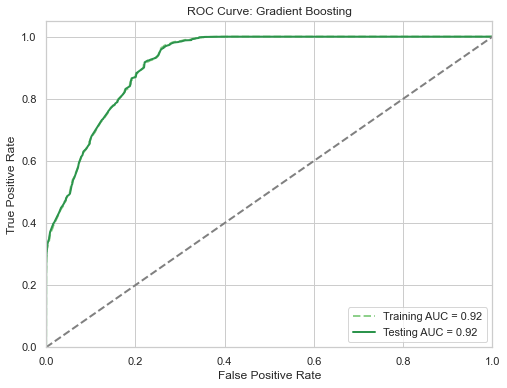

In [32]:
# Individual ROC-AUC plots for each model
colors = {
    'Random Forest': 'Blues',
    'Logistic Regression': 'Oranges',
    'Gradient Boosting': 'Greens'
}

for model_name, model in models.items():
    plt.figure(figsize=(8, 6))
    
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Predict probabilities for ROC curve
    y_train_prob = model.predict_proba(X_train_scaled)[:, 1]
    y_test_prob = model.predict_proba(X_test_scaled)[:, 1]
    
    # Compute ROC curve for training and testing
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)
    
    # Compute AUC for training and testing
    auc_train = auc(fpr_train, tpr_train)
    auc_test = auc(fpr_test, tpr_test)
    
    # Plot training ROC curve (dashed line)
    plt.plot(fpr_train, tpr_train, linestyle='--', label=f'Training AUC = {auc_train:.2f}', lw=2, color=sns.color_palette(colors[model_name])[2])
    
    # Plot testing ROC curve (solid line)
    plt.plot(fpr_test, tpr_test, linestyle='-', label=f'Testing AUC = {auc_test:.2f}', lw=2, color=sns.color_palette(colors[model_name])[4])
    
    # Random classifier line
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=2)
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve: {model_name}')
    plt.legend(loc='lower right')
    plt.show()

In [33]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
import numpy as np

# Define cross-validation settings
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Prepare a dictionary to store results
cv_results = {model_name: [] for model_name in models.keys()}

# Cross-validation loop
for model_name, model in models.items():
    print(f"\nCross-validating {model_name}...")
    fold_idx = 1
    for train_index, val_index in kf.split(X_selected, y_classification):
        # Split data
        X_train, X_val = X_selected.iloc[train_index], X_selected.iloc[val_index]
        y_train, y_val = y_classification.iloc[train_index], y_classification.iloc[val_index]
        
        # Standardize data (use the scaler only on the training set)
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_val_scaled = scaler.transform(X_val)
        
        # Train the model
        model.fit(X_train_scaled, y_train)
        
        # Predict probabilities for validation set
        y_val_prob = model.predict_proba(X_val_scaled)[:, 1]
        
        # Compute AUC
        auc_val = roc_auc_score(y_val, y_val_prob)
        cv_results[model_name].append(auc_val)
        
        print(f"Fold {fold_idx}: AUC = {auc_val:.4f}")
        fold_idx += 1

# Display mean AUC for each model
for model_name, auc_scores in cv_results.items():
    mean_auc = np.mean(auc_scores)
    print(f"{model_name} - Mean AUC: {mean_auc:.4f}")


Cross-validating Random Forest...
Fold 1: AUC = 0.9063
Fold 2: AUC = 0.9098
Fold 3: AUC = 0.9038
Fold 4: AUC = 0.9090
Fold 5: AUC = 0.9019

Cross-validating Logistic Regression...
Fold 1: AUC = 0.8952
Fold 2: AUC = 0.8980
Fold 3: AUC = 0.8935
Fold 4: AUC = 0.8960
Fold 5: AUC = 0.8924

Cross-validating Gradient Boosting...
Fold 1: AUC = 0.9201
Fold 2: AUC = 0.9217
Fold 3: AUC = 0.9208
Fold 4: AUC = 0.9237
Fold 5: AUC = 0.9162
Random Forest - Mean AUC: 0.9061
Logistic Regression - Mean AUC: 0.8950
Gradient Boosting - Mean AUC: 0.9205


In [34]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
import numpy as np

# Define cross-validation settings
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Prepare a dictionary to store results
cv_results = {model_name: [] for model_name in models.keys()}

# Cross-validation loop
for model_name, model in models.items():
    print(f"\nCross-validating {model_name}...")
    fold_idx = 1
    for train_index, val_index in kf.split(X_selected, y_classification):
        # Split data
        X_train, X_val = X_selected.iloc[train_index], X_selected.iloc[val_index]
        y_train, y_val = y_classification.iloc[train_index], y_classification.iloc[val_index]
        
        # Standardize data (use the scaler only on the training set)
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_val_scaled = scaler.transform(X_val)
        
        # Train the model
        model.fit(X_train_scaled, y_train)
        
        # Predict probabilities for validation set
        y_val_prob = model.predict_proba(X_val_scaled)[:, 1]
        
        # Compute AUC
        auc_val = roc_auc_score(y_val, y_val_prob)
        cv_results[model_name].append(auc_val)
        
        print(f"Fold {fold_idx}: AUC = {auc_val:.4f}")
        fold_idx += 1

# Display mean AUC for each model
for model_name, auc_scores in cv_results.items():
    mean_auc = np.mean(auc_scores)
    print(f"{model_name} - Mean AUC: {mean_auc:.4f}")


Cross-validating Random Forest...
Fold 1: AUC = 0.9088
Fold 2: AUC = 0.9022
Fold 3: AUC = 0.9097
Fold 4: AUC = 0.9097
Fold 5: AUC = 0.9075
Fold 6: AUC = 0.9009
Fold 7: AUC = 0.9125
Fold 8: AUC = 0.9039
Fold 9: AUC = 0.9043
Fold 10: AUC = 0.9049

Cross-validating Logistic Regression...
Fold 1: AUC = 0.8960
Fold 2: AUC = 0.8943
Fold 3: AUC = 0.8972
Fold 4: AUC = 0.8988
Fold 5: AUC = 0.8920
Fold 6: AUC = 0.8950
Fold 7: AUC = 0.8942
Fold 8: AUC = 0.8976
Fold 9: AUC = 0.8935
Fold 10: AUC = 0.8914

Cross-validating Gradient Boosting...
Fold 1: AUC = 0.9227
Fold 2: AUC = 0.9185
Fold 3: AUC = 0.9251
Fold 4: AUC = 0.9241
Fold 5: AUC = 0.9179
Fold 6: AUC = 0.9199
Fold 7: AUC = 0.9199
Fold 8: AUC = 0.9239
Fold 9: AUC = 0.9183
Fold 10: AUC = 0.9169
Random Forest - Mean AUC: 0.9064
Logistic Regression - Mean AUC: 0.8950
Gradient Boosting - Mean AUC: 0.9207
